In [201]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
def weights(year,month):
    if int(month) == 12:
        year = int(year) + 1
        month = '01'
    else:
        def add_zero(number):
            return "{:02d}".format(number) if len(str(number)) == 1 else str(number)
        month = add_zero(int(int(month) + 1))
    df = pd.read_excel('archive-'+str(year)+'/news-release-table1-'+str(year)+str(month)+'.xlsx', index_col=[1])
    df = df.iloc[2:,:]
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df.iloc[1:,:]
    df = df.drop(2,axis=0)
    df = df.reset_index(drop=True)
    cols = list(df.columns)
    multi_index = []
    cur_label = None
    for i, col in enumerate(cols):
        if col == col:  
            cur_label = col
            multi_index.append((cur_label, i))
        else:
            multi_index.append((cur_label, i))
    multi_index = pd.MultiIndex.from_tuples(multi_index)
    df.columns = multi_index
    new_labels = df.iloc[0]
    new_multiindex = pd.MultiIndex.from_tuples(list(zip(df.columns.get_level_values(0), new_labels)))
    df.columns = new_multiindex
    df = df.iloc[1:,:]
    tuples = []
    for level1, level2 in df.columns:
        if isinstance(level1, float):
            level1 = str(level1)
        if isinstance(level2, float):
            level2 = str(level2)
        tuples.append((level1.replace("\n", " "), level2.replace("\n", " ")))
    new_multiindex = pd.MultiIndex.from_tuples(tuples)
    df.columns = new_multiindex
    df = df.dropna(how='all')
    return df

In [162]:
dfs = []
for year in range(2020,2023):
    for month in range(1,13):
        if year == 2022 and month == 12:
            continue
        else:
            dfs.append(weights(year,month))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default st

In [163]:
def editor(df):
        df = df.iloc[:,:3]
        return df

In [172]:
dfs = [editor(df) for df in dfs]
food_row = []
[food_row.append(df[df.iloc[:,0] == 'Food']) for df in dfs]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [197]:
food_values = []
[food_values.append(list(df.iloc[:,2])[0])for df in food_row]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [196]:
list(food_row[0].iloc[:,2])[0]

13.783

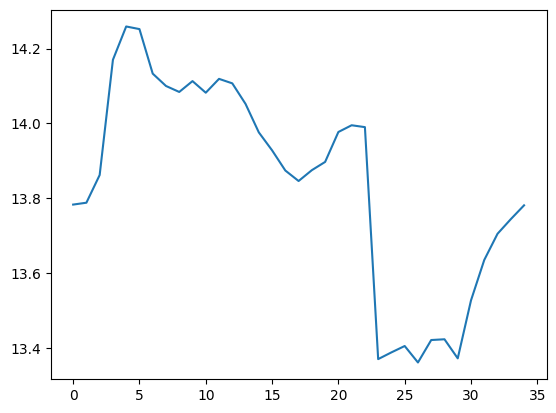

In [202]:
plt.plot(food_values)

In [203]:
pd.read_csv('economic_calendar.csv')

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,187087,2000-01-01,03:00,united states,USD,low,All Car Sales (Dec),8.97M,NaN,8.81M
1,283137,2000-01-01,03:00,united states,USD,low,All Truck Sales (Dec),8.82M,NaN,8.26M
2,64457,2000-01-01,03:00,united states,USD,medium,Business Inventories (MoM) (Dec),0.80%,NaN,1.10%
3,64914,2000-01-01,03:00,united states,USD,low,Capacity Utilization Rate (Dec),82.20%,NaN,81.90%
4,67850,2000-01-01,03:00,united states,USD,high,CB Consumer Confidence (Dec),141.70,NaN,137.00
...,...,...,...,...,...,...,...,...,...,...
79126,464135,2022-12-16,14:30,united states,USD,low,CFTC Natural Gas speculative net positions,-153.7K,NaN,-164.0K
79127,464138,2022-12-16,14:30,united states,USD,medium,CFTC S&P 500 speculative net positions,-230.1K,NaN,-203.7K
79128,464139,2022-12-16,14:30,united states,USD,low,CFTC Silver speculative net positions,22.8K,NaN,19.2K
79129,464140,2022-12-16,14:30,united states,USD,low,CFTC Soybeans speculative net positions,113.1K,NaN,89.7K
